# Logistic Regression

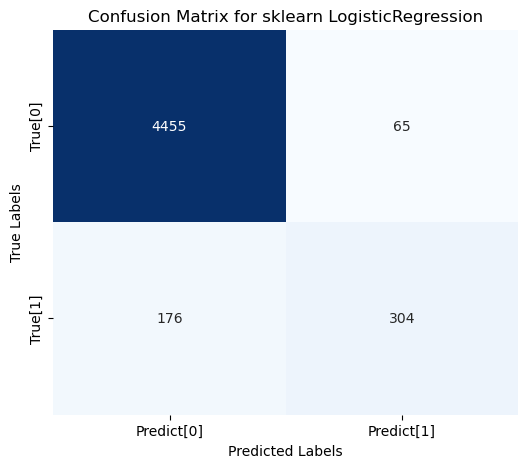

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9
                          Results: Logit
Model:               Logit             Method:            MLE      
Dependent Variable:  PersonalLoan      Pseudo R-squared:  0.594    
Date:                2024-11-05 10:10  AIC:               1308.3528
No. Observations:    5000              BIC:               1386.5591
Df Model:            11                Log-Likelihood:    -642.18  
Df Residuals:        4988              LL-Null:           -1581.0  
Converged:           1.0000            LLR p-value:       0.0000   
No. Iterations:      9.0000            Scale:             1.0000   
-------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const             -12.1927   1.6452 -7.4112 0.0000 -15.4171 -8.9682
Age                -0.0536   0.0613 -0.87

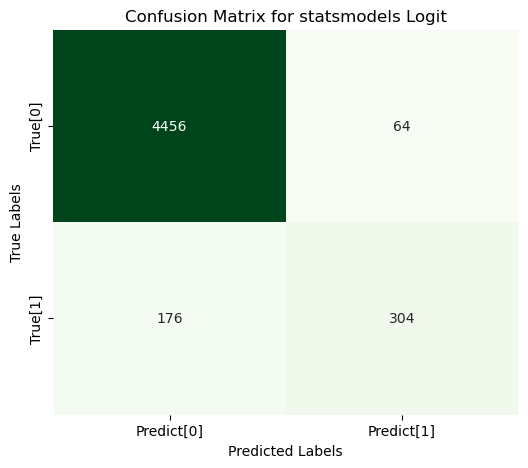

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import seaborn as sns

# Load and preprocess the data
bank = pd.read_csv('UniversalBank.csv')
bank['Education'] = bank['Education'].astype('category')

# Define features and target
X = bank.drop(['ID', 'ZIPCode', 'PersonalLoan'], axis=1)
y = bank['PersonalLoan'].astype('category')

# Logistic Regression with sklearn
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X, y)
y_pred = logistic.predict(X)

# Confusion matrix for sklearn LogisticRegression
confmat_sklearn = confusion_matrix(y, y_pred)
confmat_sklearn_df = pd.DataFrame(confmat_sklearn, 
                                  index=['True[0]', 'True[1]'], 
                                  columns=['Predict[0]', 'Predict[1]'])

# Plot sklearn confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confmat_sklearn_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for sklearn LogisticRegression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Logistic Regression with statsmodels
X_sm = sm.add_constant(X)  # Add constant term
logit_model = sm.Logit(y, X_sm)
logit_result = logit_model.fit()
print(logit_result.summary2())

# Predictions with statsmodels Logit model
y_pred_sm = logit_result.predict(X_sm) > 0.5  # Threshold at 0.5
y_pred_sm = y_pred_sm.astype(int)

# Confusion matrix for statsmodels Logit
confmat_sm = confusion_matrix(y, y_pred_sm)
confmat_sm_df = pd.DataFrame(confmat_sm, 
                             index=['True[0]', 'True[1]'], 
                             columns=['Predict[0]', 'Predict[1]'])

# Plot statsmodels confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confmat_sm_df, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix for statsmodels Logit')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
